<a href="https://colab.research.google.com/github/imtiazhabib17/Handwritten-Digits-Recognition/blob/main/Hand_Written_Digit_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include the channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
# define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 47s 108ms/step - loss: 0.2266 - accuracy: 0.9336 - val_loss: 0.0635 - val_accuracy: 0.9808
Epoch 2/10
422/422 [==============================] - 47s 111ms/step - loss: 0.0591 - accuracy: 0.9820 - val_loss: 0.0471 - val_accuracy: 0.9867
Epoch 3/10
422/422 [==============================] - 45s 107ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0518 - val_accuracy: 0.9857
Epoch 4/10
422/422 [==============================] - 46s 110ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0385 - val_accuracy: 0.9892
Epoch 5/10
422/422 [==============================] - 45s 107ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0403 - val_accuracy: 0.9892
Epoch 6/10
422/422 [==============================] - 46s 110ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0352 - val_accuracy: 0.9903
Epoch 7/10
422/422 [==============================] - 45s 108ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0349 - val_ac

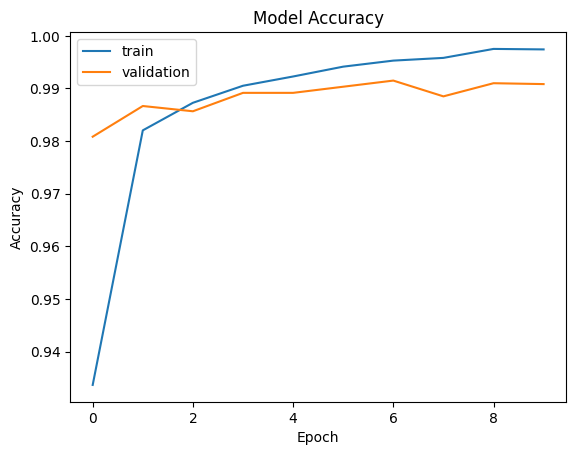

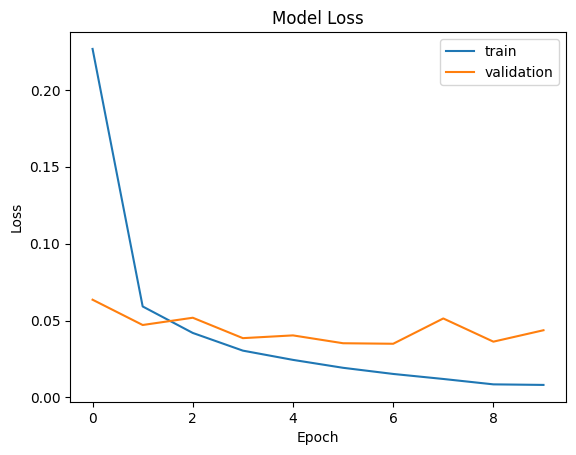

In [ ]:
# create accuracy and loss plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('loss.png')
plt.show()

313/313 [==============================] - 4s 13ms/step - loss: 0.0335 - accuracy: 0.9922
Test accuracy: 0.9922000169754028
313/313 [==============================] - 3s 9ms/step


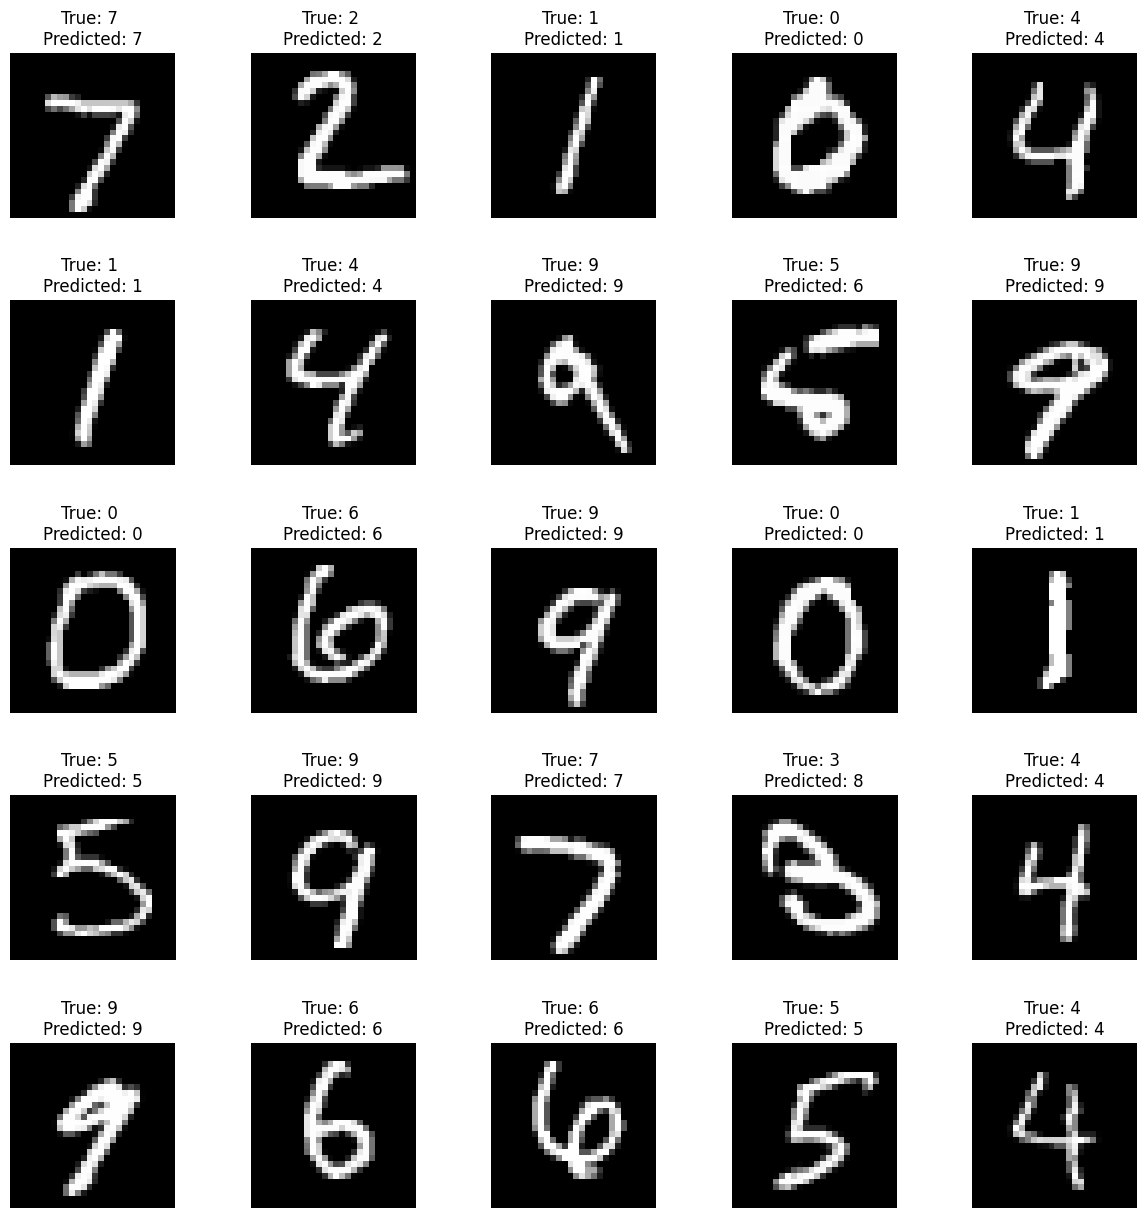

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Predict the labels for the test dataset
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Function to plot images, true labels, and predicted labels
def plot_images(images, true_labels, pred_labels, nrows=5, ncols=5):
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))
    axes = axes.ravel()

    for i in range(nrows * ncols):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"True: {true_labels[i]} \nPredicted: {pred_labels[i]}", fontsize=12)
        axes[i].axis('off')
    plt.subplots_adjust(hspace=0.5)

# Visualize the testing results
plot_images(x_test, y_test_labels, y_pred_labels)
plt.show()

In [ ]:
model.save("digit_detection_model.h5")